In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
test = pd.read_table('C:/Users/kosuke/dataset/kinoko_test.tsv')
train = pd.read_table('C:/Users/kosuke/dataset/kinoko_train.tsv')

C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [4]:
test.shape

(4062, 23)

In [5]:
train.shape

(4062, 24)

In [12]:
train = train.drop(['id'], 1)
train.head()

,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,y,n,f,f,f,c,n,b,...,k,w,w,p,w,o,e,w,v,d
1,p,f,y,y,f,f,f,c,b,p,...,k,b,p,p,w,o,l,h,y,g
2,e,b,y,w,t,l,f,c,b,k,...,s,w,w,p,w,o,p,k,n,m
3,p,x,s,b,t,f,f,c,b,h,...,s,w,w,p,w,o,p,h,v,u
4,p,x,s,w,t,f,f,c,b,w,...,f,w,w,p,w,o,p,h,v,g


In [19]:
train_le = pd.get_dummies(train, drop_first=True, columns=["cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-type","spore-print-color","habitat"])

In [14]:
from sklearn import preprocessing

In [20]:
for column in ["Y","gill-spacing","gill-size","ring-number","population"]:
    selected_column = train_le[column]
    le = preprocessing.LabelEncoder()
    le.fit(selected_column)
    column_le = le.transform(selected_column)
    train_le[column] = pd.Series(column_le).astype('category')

In [21]:
train_le.head()

,Y,gill-spacing,gill-size,ring-number,population,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,1,1,4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_le.iloc[:,1:], train_le.iloc[:,0], test_size=0.3, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2843, 90) (1219, 90) (2843,) (1219,)


In [24]:
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.target import ClassBalance

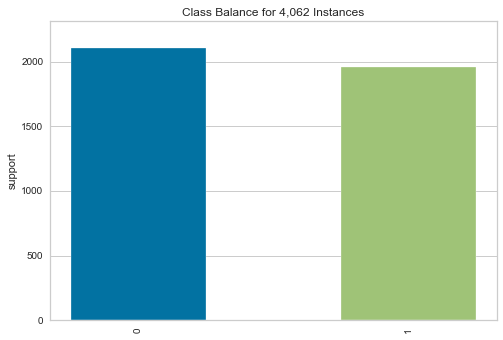

In [26]:
visualizer = ClassBalance()
visualizer.fit(train_le.iloc[:,0])
plt.xticks(rotation=90)
visualizer.poof()

In [27]:
from sklearn.svm import SVC

In [33]:
kernel = ['linear', 'rbf', 'poly']
clf = []
C = [1, 10, 100, 0.1, 0.01]
for a in C  :
    for i in kernel :
            svm = SVC(C=a, gamma='auto', kernel=i, random_state=42, class_weight='balanced')
            clf.append(svm.fit(X_train, y_train))

In [34]:
from sklearn import metrics

In [35]:
def calc_metrics(y_test, y_pred):
    pre = metrics.precision_score(y_test, y_pred, average='micro')  
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='micro')
    metrics_list = [pre, recall, acc, f1]
    
    return metrics_list

In [36]:
result = []

for i in range(len(clf)):
    y_pred = clf[i].predict(X_test)
    result.append(calc_metrics(y_test, y_pred))

In [37]:
result_df = pd.DataFrame(result, columns=['Precision', 'Recall', 'Acc', 'F-score'])
result_df = result_df.assign(Kernel=kernel*5)
C_str = ['1', '1', '1','10','10','10','100','100','100','0.1','0.1','0.1','0.01','0.01','0.01']
result_df = result_df.assign(C = C_str)
result_df = result_df[['Kernel','C','Precision', 'Recall', 'Acc', 'F-score']]
round(result_df, 3)

,Kernel,C,Precision,Recall,Acc,F-score
0,linear,1,1.000,1.000,1.000,1.000
1,rbf,1,0.989,0.989,0.989,0.989
2,poly,1,0.963,0.963,0.963,0.963
3,linear,10,1.000,1.000,1.000,1.000
4,rbf,10,0.999,0.999,0.999,0.999
5,poly,10,0.989,0.989,0.989,0.989
6,linear,100,1.000,1.000,1.000,1.000
7,rbf,100,1.000,1.000,1.000,1.000
8,poly,100,1.000,1.000,1.000,1.000
9,linear,0.1,0.996,0.996,0.996,0.996
